In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#graphing functions
def plotGenotype_2D(graphInfo, title="Genotype Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["WPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["DPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["HPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def plotAllele_2D(graphInfo, title="Allele Generation Plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model_3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

In [4]:
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation_iE(simData):
    w=simData['qW']
    d=simData['qD']
    fW=simData['fW']
    fD=simData['fD']
    h=simData['h']
    fH=fW*(1-h)+fD*h
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        e=simData['e']
    else:
        e=a*simData['eP']+(1-a)*simData['e']
    #prevent redundant multiplication and create less rounding errors
    w2=w*w
    wd=w*d
    d2=d*d
    fBar=1-((1-fW)*w2+(1-fD)*(d2+2*wd*e)+(1-fH)*(2*wd*(1-e)))
    wPrime=(fW*w2+fH*(wd*(1-e)))
    dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))
    #wPrime=(fW*w2+fH*(wd*(1-e)))/fBar
    #dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))/fBar
    #print({'w':wPrime, 'd':dPrime,'fB':1-fBar})
    #print(wPrime+dPrime+(1-fBar))
    wPrime/=fBar
    dPrime/=fBar
    
    #remove rounding errors
    total=wPrime+dPrime
    if total!=1:
        wPrime/=total
        dPrime/=total

    
    homoW=(w2)
    homoD=(d2+2*wd*e)
    heterozygote=(2*wd*(1-e))
    return {'qW':wPrime,'qD':dPrime,'WW':homoW,'DD':homoD,'WD':heterozygote}

    
def run_simulation_iE(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "WPlots": [simData['qW']], "DPlots": [simData['qD']], "HPlots": [0], "wPlots":[simData['qW']], "dPlots":[simData['qD']]}
    w=simData['qW']*simData['fW']
    d=simData['qD']*simData['fD']
    total=w+d
    simData['qW']=w/total
    simData['qD']=d/total
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iE(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['WPlots'].append(simData['WW'])
        graphInfo['DPlots'].append(simData['DD'])
        graphInfo['HPlots'].append(simData['WD'])
        if simData['qW']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plotGenotype_2D(graphInfo)
        plotAllele_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

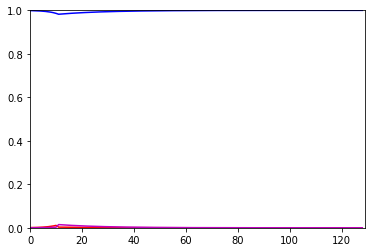

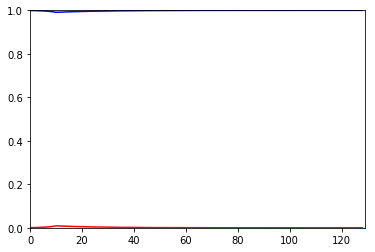

     xPlots    WPlots    DPlots    HPlots    wPlots    dPlots
0         0  0.999000  0.001000  0.000000  0.999000  0.001000
1         1  0.998600  0.001120  0.000280  0.999097  0.000903
2         2  0.998194  0.001445  0.000361  0.998835  0.001165
3         3  0.997671  0.001864  0.000466  0.998497  0.001503
4         4  0.996995  0.002404  0.000600  0.998060  0.001940
5         5  0.996124  0.003101  0.000774  0.997497  0.002503
6         6  0.995001  0.004000  0.000999  0.996771  0.003229
7         7  0.993552  0.005160  0.001287  0.995833  0.004167
8         8  0.991684  0.006656  0.001660  0.994623  0.005377
9         9  0.989275  0.008585  0.002139  0.993061  0.006939
10       10  0.986170  0.011074  0.002756  0.991044  0.008956
11       11  0.982167  0.003098  0.014735  0.991543  0.008457
12       12  0.983157  0.002923  0.013921  0.992014  0.007986
13       13  0.984092  0.002757  0.013151  0.992460  0.007540
14       14  0.984976  0.002601  0.012422  0.992881  0.007119
15      

-3.363585661014858

In [5]:
#checks out and genotype frequencies equal the same as genotype model
#sim cuts at 128 rather than 141 because D allele freq reaches .99999 
#faster than DD genotype does
simData={'qW':.999,'qD':.001,'fW':1,'fD':.7,'e':.8,'h':.5,'eP':.1,'a':.9,'generations':1000,'induceStart':10}
run_simulation_iE(simData,True,True)


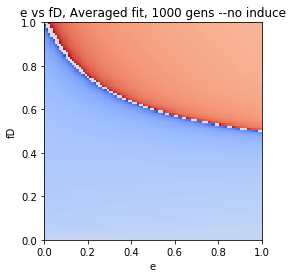

In [6]:
eVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(eVals,yVals)
Z=np.zeros((len(eVals),len(yVals)))
#run 2D sim e vs f
for eIndex in range(len(eVals)):
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'h':.5,'e':eVals[eIndex],'d':.5,'a':0,'eP':.1,'generations':1000,'induceStart':10}
        takeover=run_simulation_iE(simData)
        Z[yIndex,eIndex]=takeover
model_3D(X,Y,Z,'e','fD','e vs fD, Averaged fit, 1000 gens --no induce')

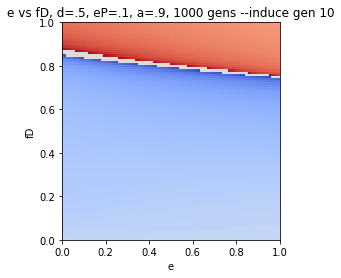

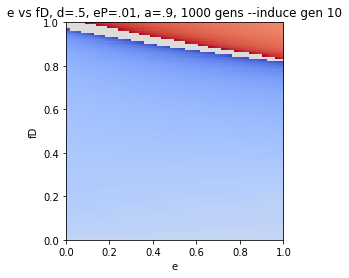

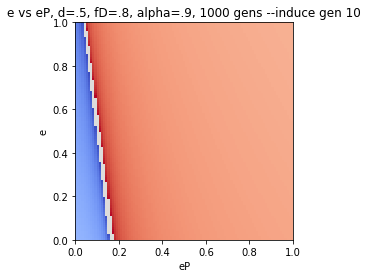

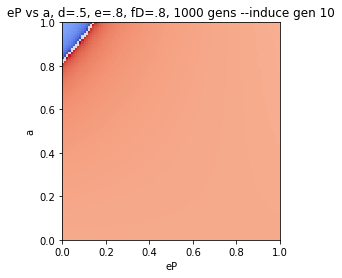

In [7]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'h':.5,'e':xVals[xIndex],'eP':.1,'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'e','fD','e vs fD, d=.5, eP=.1, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'h':.5,'e':xVals[xIndex],'eP':.01,'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'e','fD','e vs fD, d=.5, eP=.01, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e'
    for yIndex in range(len(yVals)):
        #y is e
        simData={'qW':.999,'qD':.001,'fW':1,'fD':.8,'h':.5,'e':yVals[yIndex],'eP':xVals[xIndex],'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eP','e','e vs eP, d=.5, fD=.8, alpha=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e'
    for yIndex in range(len(yVals)):
        #y is alpha
        simData={'qW':.999,'qD':.001,'fW':1,'fD':.8,'h':.5,'e':.8,'eP':xVals[xIndex],'a':yVals[yIndex],'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eP','a','eP vs a, d=.5, e=.8, fD=.8, 1000 gens --induce gen 10')

eP: 0
eP: 1
eP: 2
eP: 3
eP: 4
eP: 5
eP: 6
eP: 7
eP: 8
eP: 9
eP: 10
eP: 11
eP: 12
eP: 13
eP: 14
eP: 15
eP: 16
eP: 17
eP: 18
eP: 19
eP: 20
eP: 21
eP: 22
eP: 23
eP: 24
eP: 25
eP: 26
eP: 27
eP: 28
eP: 29
eP: 30
eP: 31
eP: 32
eP: 33
eP: 34
eP: 35
eP: 36
eP: 37
eP: 38
eP: 39
eP: 40
eP: 41
eP: 42
eP: 43
eP: 44
eP: 45
eP: 46
eP: 47
eP: 48
eP: 49
eP: 50
eP: 51
eP: 52
eP: 53
eP: 54
eP: 55
eP: 56
eP: 57
eP: 58
eP: 59
eP: 60
eP: 61
eP: 62
eP: 63
eP: 64
eP: 65
eP: 66
eP: 67
eP: 68
eP: 69
eP: 70
eP: 71
eP: 72
eP: 73
eP: 74
eP: 75
eP: 76
eP: 77
eP: 78
eP: 79
eP: 80
eP: 81
eP: 82
eP: 83
eP: 84
eP: 85
eP: 86
eP: 87
eP: 88
eP: 89
eP: 90
eP: 91
eP: 92
eP: 93
eP: 94
eP: 95
eP: 96
eP: 97
eP: 98
eP: 99
eP: 100
[99. 98. 98. 98. 98. 98. 97. 97. 97. 97. 97. 96. 96. 96. 96. 96. 95. 95.
 95. 95. 95. 94. 94. 94. 94. 94. 93. 93. 93. 93. 93. 93. 92. 92. 92. 92.
 92. 92. 91. 91. 91. 91. 91. 91. 90. 90. 90. 90. 90. 90. 89. 89. 89. 89.
 89. 89. 89. 88. 88. 88. 88. 88. 88. 88. 87. 87. 87. 87. 87. 87. 87. 86.
 86. 86. 8

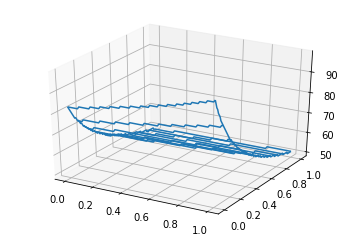

[83. 83. 83. 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84. 85. 85.
 85. 85. 85. 85. 85. 86. 86. 86. 86. 86. 86. 86. 87. 87. 87. 87. 87. 87.
 87. 88. 88. 88. 88. 88. 88. 88. 89. 89. 89. 89. 89. 89. 89. 90. 90. 90.
 90. 90. 90. 91. 91. 91. 91. 91. 91. 92. 92. 92. 92. 92. 92. 93. 93. 93.
 93. 93. 93. 94. 94. 94. 94. 94. 95. 95. 95. 95. 95. 96. 96. 96. 96. 96.
 97. 97. 97. 97. 97. 98. 98. 98. 98. 98. 99.]


In [8]:
xvs=np.arange(0,1.01,.01)
alphas=np.arange(0,1.01,.01)
aB,xB=np.meshgrid(alphas,xvs)
zMaxBlues=np.zeros((len(xvs),len(alphas)))


ePs=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
ePs=np.arange(0,1.01,.01)
for ePi in range(len(ePs)):
    print('eP: '+str(ePi))
    eP=ePs[ePi]
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(0,1.01,.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is e
        #print('e: '+str(xVals[xIndex]))
        for yIndex in range(len(yVals)):
            #y is f
            simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'h':.5,'e':xVals[xIndex],'eP':eP,'a':.9,'generations':1000,'induceStart':10}
            simData['fH']=(simData['fW']+simData['fD'])/2

            takeover=run_simulation_iE(simData)
            Z[yIndex,xIndex]=takeover
    #model3D(X,Y,Z,'e','f','e vs f, Averaged fit, 1000 gens --no induce')
    
    
    for i in range(len(Z)):
        #print(Z[i])
        col=''
        max=0
        for j in range(len(Z[i])):
            col+=str(Z[j][i])+','
            if j>max and Z[j][i]<0:
                max=j
        col+='-'
        #print(col)
        #print(max)
        zMaxBlues[ePi][i]=max

    


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np





for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break

for i in range(len(zMaxBlues)):
    for j in range(len(zMaxBlues[0])//2):
        temp=zMaxBlues[i][j]

        zMaxBlues[i][j]=zMaxBlues[i][len(zMaxBlues[0])-1-j]
        zMaxBlues[i][len(zMaxBlues[0])-1-j]=temp
# In[35]:

fig = plt.figure()
ax = fig.gca(projection='3d')
zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()

for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break


    

In [9]:
holdZ=np.array(zMaxBlues)

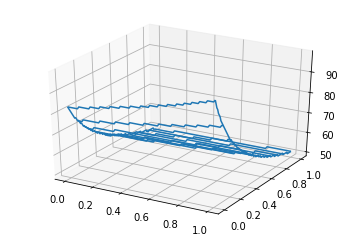

x=e, y=f, z=eP


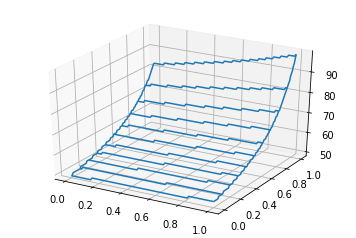

In [10]:

zMaxBlues=holdZ

fig = plt.figure()
ax = fig.gca(projection='3d')
zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()


for i in range(len(zMaxBlues)//2):
    temp=np.array(zMaxBlues[i])
    #print(temp)
    zMaxBlues[i]=zMaxBlues[len(zMaxBlues)-1-i]
    #print(zMaxBlues[i])
    zMaxBlues[len(zMaxBlues)-1-i]=temp
    #print(zMaxBlues[len(zMaxBlues)-1-i])
# In[35]:
print("x=e, y=f, z=eP")
fig = plt.figure()
ax = fig.gca(projection='3d')
zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()

eP: 0


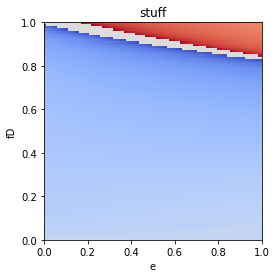

eP: 1


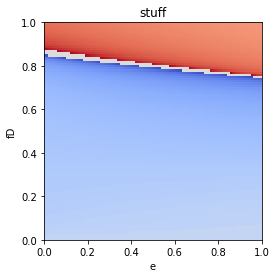

eP: 2


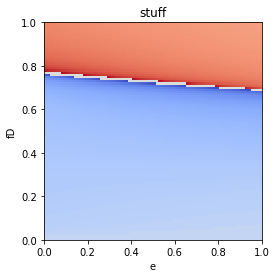

eP: 3


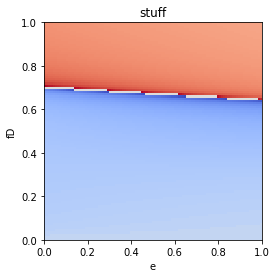

eP: 4


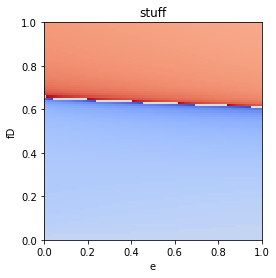

eP: 5


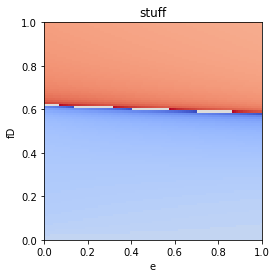

eP: 6


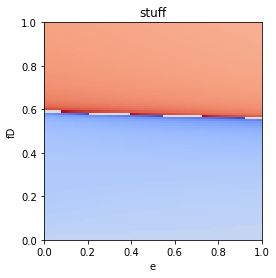

eP: 7


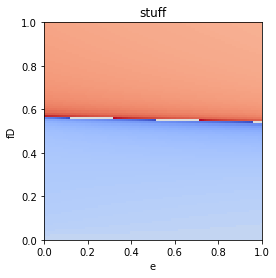

eP: 8


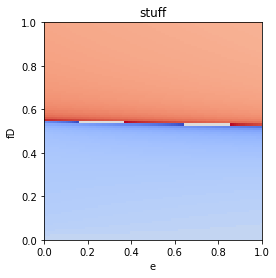

eP: 9


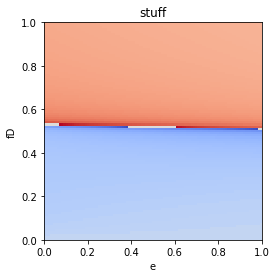

eP: 10


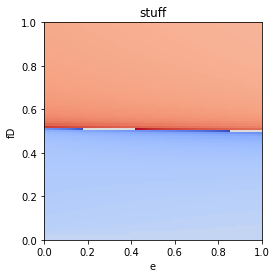

In [13]:
ePs=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for ePi in range(len(ePs)):
    print('eP: '+str(ePi))
    eP=ePs[ePi]
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(0,1.01,.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is e
        #print('e: '+str(xVals[xIndex]))
        for yIndex in range(len(yVals)):
            #y is f
            simData={'qW':.999,'qD':.001,'fW':1,'fD':yVals[yIndex],'h':.5,'e':xVals[xIndex],'eP':eP,'a':.9,'generations':1000,'induceStart':10}
            simData['fH']=(simData['fW']+simData['fD'])/2

            takeover=run_simulation_iE(simData)
            Z[yIndex,xIndex]=takeover
    model_3D(X,Y,Z,'e','fD','stuff')